<a href="https://colab.research.google.com/github/HeiderJeffer/Participatory-Modeling-for-Societal-Complexity-in-Healthcare/blob/main/hmm_stakeholder_simulation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

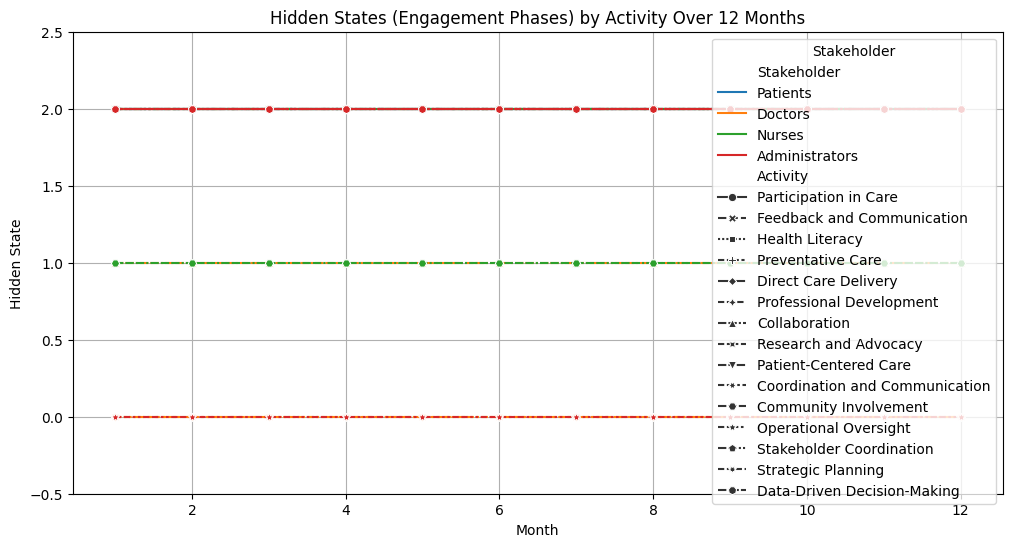

In [ ]:
# Simulating and Visualizing Stakeholder Engagement Phases Using Hidden Markov Models
# By Heider Jeffer

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from hmmlearn.hmm import GaussianHMM

# Define stakeholders and their activities
stakeholders = {
    'Patients': {
        'activities': {
            'Participation in Care': 0.6,
            'Feedback and Communication': 0.5,
            'Health Literacy': 0.55,
            'Preventative Care': 0.7
        }
    },
    'Doctors': {
        'activities': {
            'Direct Care Delivery': 0.8,
            'Professional Development': 0.7,
            'Collaboration': 0.75,
            'Research and Advocacy': 0.65
        }
    },
    'Nurses': {
        'activities': {
            'Patient-Centered Care': 0.75,
            'Coordination and Communication': 0.8,
            'Professional Development': 0.7,
            'Community Involvement': 0.6
        }
    },
    'Administrators': {
        'activities': {
            'Operational Oversight': 0.5,
            'Stakeholder Coordination': 0.45,
            'Strategic Planning': 0.55,
            'Data-Driven Decision-Making': 0.6
        }
    }
}

# Function to simulate engagement levels for each activity over time
def simulate_activity_engagement(stakeholders, months=12, fluctuation=0.05):
    """Simulate engagement levels for each activity of all stakeholders over time."""
    engagement_over_time = []
    for stakeholder, data in stakeholders.items():
        for activity, base_engagement in data['activities'].items():
            monthly_engagement = [base_engagement]
            for _ in range(1, months):
                # Simulate random fluctuation for each month
                change = np.random.uniform(-fluctuation, fluctuation)
                new_engagement = max(0, min(1, monthly_engagement[-1] + change))
                monthly_engagement.append(new_engagement)
            # Store results for each activity
            for month, engagement in enumerate(monthly_engagement, start=1):
                engagement_over_time.append({
                    'Stakeholder': stakeholder,
                    'Activity': activity,
                    'Month': month,
                    'Engagement': engagement
                })
    return pd.DataFrame(engagement_over_time)

# Simulate engagement levels
months = 12  # You can change this value to simulate for a different number of months
df_activity_engagement = simulate_activity_engagement(stakeholders, months=months)

# Reshape the data for HMM
engagement_data = df_activity_engagement.pivot_table(index=['Stakeholder', 'Activity', 'Month'], columns='Activity', values='Engagement').fillna(0)
observations = engagement_data.values  # This is the data we will feed into the HMM

# Define and fit the Hidden Markov Model
model = GaussianHMM(n_components=3, covariance_type="full", n_iter=1000)
model.fit(observations)

# Predict the hidden states
hidden_states = model.predict(observations)

# Ensure hidden states are assigned correctly by matching the length
df_activity_engagement['Hidden State'] = np.nan  # Initialize column

# Assign the hidden states to the 'Hidden State' column for all rows
df_activity_engagement['Hidden State'] = np.tile(hidden_states, len(df_activity_engagement) // len(hidden_states))

# Visualize Hidden States
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_activity_engagement, x='Month', y='Hidden State', hue='Stakeholder', style='Activity', markers=True)
plt.title(f"Hidden States (Engagement Phases) by Activity Over {months} Months")
plt.xlabel("Month")
plt.ylabel("Hidden State")
plt.ylim(-0.5, 2.5)
plt.grid()
plt.legend(title="Stakeholder")
plt.show()
